In [1]:
import stim

### We want to verify whether the results of measurement shown in Fig. 2 in the paper are correct or not

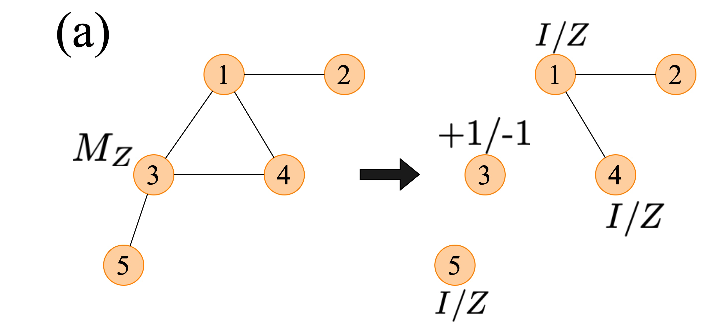

In [2]:
circuit = stim.Circuit('''
    H 0 1 2 3 4
    CZ 0 1 0 2 0 3 2 3 2 4
''')

# make sure that the state is the same as what we expect
queries = ['XZZZ_', 'ZX___', 'Z_XZZ', 'Z_ZX_', '__Z_X']

s = stim.TableauSimulator()
s.do(circuit)
for q in queries:
    assert s.peek_observable_expectation(stim.PauliString(q)) == 1

# fig 2.a perform Mz on qubit 2 with +1 result
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_z(2, desired_value=False)
queries_mz_plus = [f'{q[0:2]}_{q[3:]}' for q in queries]
queries_mz_plus[2] = '__Z__'
for q in queries_mz_plus:
    assert s.peek_observable_expectation(stim.PauliString(q)) == 1


# fig 2.b perform Mz on qubit 2 with -1 result
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_z(2, desired_value=True)
queries_mz_minus = [stim.PauliString('Z__ZZ') * stim.PauliString(q) * stim.PauliString('Z__ZZ') for q in queries_mz_plus]
queries_mz_minus[2] = '-__Z__'
for q in queries_mz_minus:
    assert s.peek_observable_expectation(stim.PauliString(q)) == 1

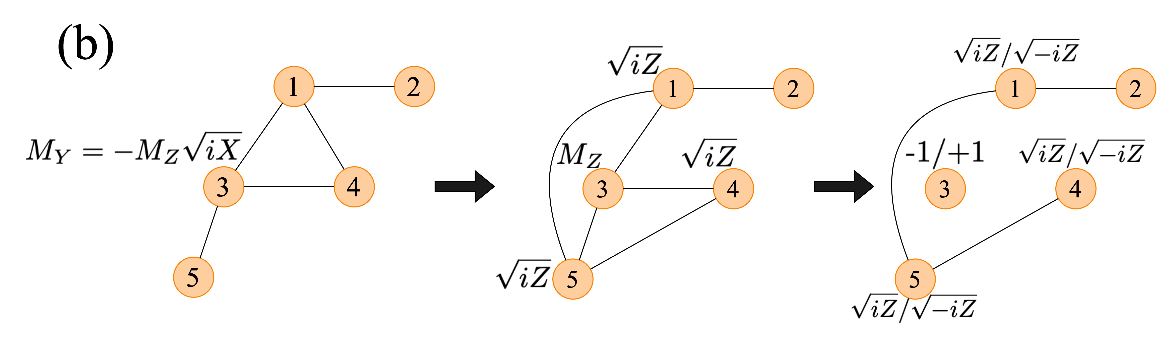

In [3]:
circuit = stim.Circuit('''
    H 0 1 2 3 4
    CZ 0 1 0 2 0 3 2 3 2 4
''')

transformed_circuit = stim.Circuit('''
    H 0 1 2 3 4
    CZ 0 1 0 4 3 4
''')

# make sure that the state is the same as what we expect
queries = ['XZZZ_', 'ZX___', 'Z_XZZ', 'Z_ZX_', '__Z_X']
queries_transformed = ['XZ__Z', 'ZX___', '__X__', '___XZ', 'Z__ZX']

transformed_circuit_my_plus = stim.Circuit('''
    H 0 1 2 3 4
    CZ 0 1 0 4 3 4

''')

s = stim.TableauSimulator()
s.do(circuit)
for q in queries:
    assert s.peek_observable_expectation(stim.PauliString(q)) == 1

s = stim.TableauSimulator()
s.do(transformed_circuit)
for q in queries_transformed:
    assert s.peek_observable_expectation(stim.PauliString(q)) == 1

# creating the query stabilizers for my-plus and my-minus
s = stim.TableauSimulator()
s.do(transformed_circuit)
s.s_dag(0)
s.s_dag(3)
s.s_dag(4)
s.s_dag(2)
queries_my_minus = s.canonical_stabilizers()

s = stim.TableauSimulator()
s.do(transformed_circuit)
s.s(0)
s.s(3)
s.s(4)
s.s(2)
queries_my_plus = s.canonical_stabilizers()

# fig 2.b perform My on qubit 2 with +1 result
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_y(2, desired_value=False)
for q in queries_my_plus:
    assert s.peek_observable_expectation(stim.PauliString(q)) == 1
    # print(q, s.peek_observable_expectation(stim.PauliString(q)))

# fig 2.b perform My on qubit 2 with -1 result
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_y(2, desired_value=True)
for q in queries_my_minus:
    assert s.peek_observable_expectation(stim.PauliString(q)) == 1
    # print(q, s.peek_observable_expectation(stim.PauliString(q)))

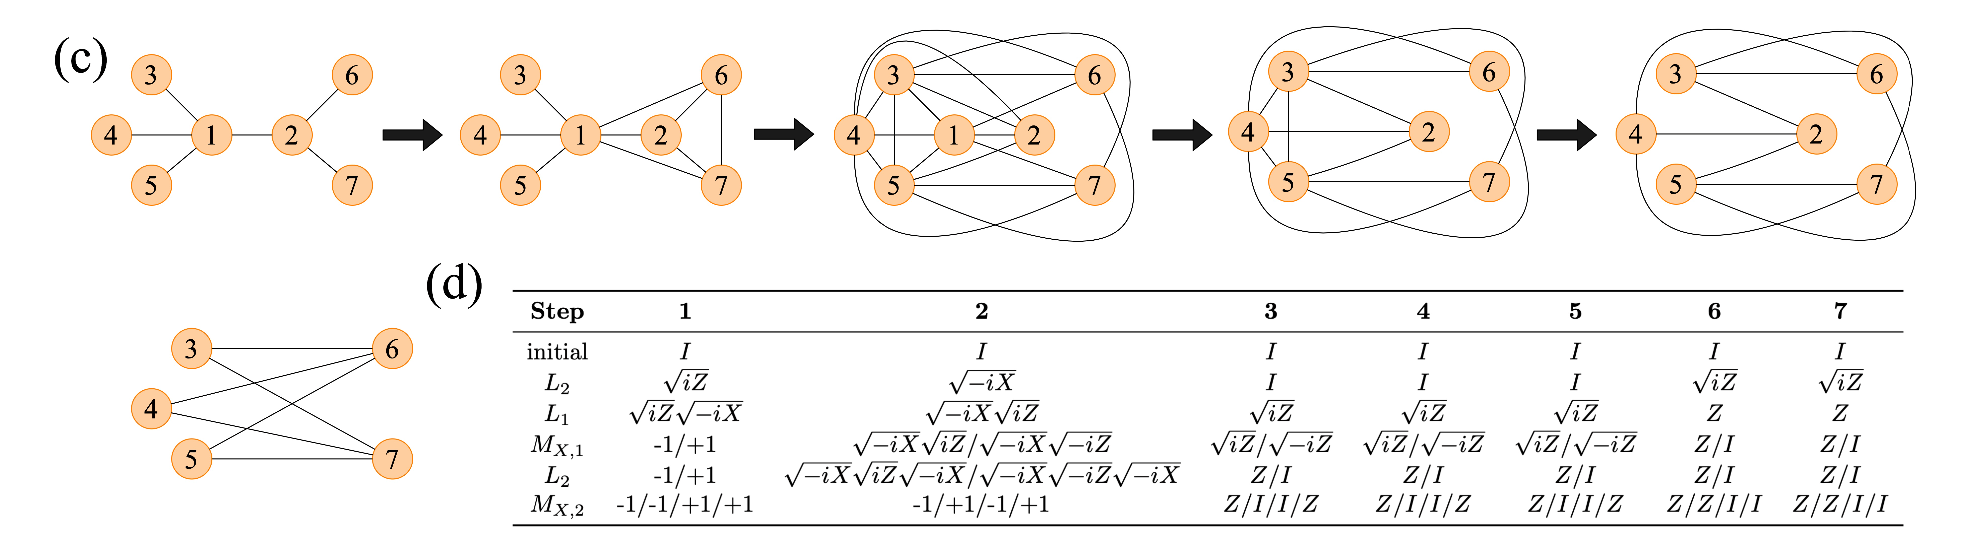

In [4]:
circuit = stim.Circuit('''
    H 0 1 2 3 4 5 6
    CZ 0 2 0 3 0 4 0 1 1 5 1 6
''')

transformed_circuit = stim.Circuit('''
    H 0 1 2 3 4 5 6
    CZ 2 5 2 6 3 5 3 6 4 5 4 6
''')

# make sure that the state is the same as what we expect
queries = ['XZZZZ__', 'ZX___ZZ', 'Z_X____', 'Z__X___', 'Z___X__', '_Z___X_', '_Z____X']
queries_transformed = ['X______', '_X_____', '__X__ZZ', '___X_ZZ', '____XZZ', '__ZZZX_', '__ZZZ_X']

queries = [stim.PauliString(q) for q in queries]
queries_transformed = [stim.PauliString(q) for q in queries_transformed]

s = stim.TableauSimulator()
s.do(circuit)
for q in queries:
    assert s.peek_observable_expectation(q) == 1

s = stim.TableauSimulator()
s.do(transformed_circuit)
for q in queries_transformed:
    assert s.peek_observable_expectation(q) == 1

## for results +1 +1
p = stim.PauliString('_______')
queries_00 = [p * q * p for q in queries_transformed]
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_x(0, desired_value=False)
s.postselect_x(1, desired_value=False)
for q in queries_00:
    assert s.peek_observable_expectation(q) == 1


## for results +1 -1
p = stim.PauliString('__ZZZ__')
queries_01 = [p * q * p for q in queries_transformed]
queries_01[1] *= -1
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_x(0, desired_value=False)
s.postselect_x(1, desired_value=True)
for q in queries_01:
    # print(q, s.peek_observable_expectation(q))
    assert s.peek_observable_expectation(q) == 1

## for results -1 +1
p = stim.PauliString('_____ZZ')
queries_10 = [p * q * p for q in queries_transformed]
queries_10[0] *= -1
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_x(0, desired_value=True)
s.postselect_x(1, desired_value=False)
for q in queries_10:
    # print(q, s.peek_observable_expectation(q))
    assert s.peek_observable_expectation(q) == 1

## for results -1 -1
p = stim.PauliString('__ZZZZZ')
queries_11 = [p * q * p for q in queries_transformed]
queries_11[0] *= -1
queries_11[1] *= -1
s = stim.TableauSimulator()
s.do(circuit)
s.postselect_x(0, desired_value=True)
s.postselect_x(1, desired_value=True)
for q in queries_11:
    # print(q, s.peek_observable_expectation(q))
    assert s.peek_observable_expectation(q) == 1

For the XX-measurements, we can also see the confirmation with the results from quirk as depicted below. These agree with the results above from the `stim.TableauSimulator`

([here](https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22],[%22•%22,%22Z%22,%22Z%22,%22Z%22],[1,%22•%22,1,1,%22Z%22,%22Z%22,%22Z%22],[%22H%22,%22H%22],[%22ZDetectControlReset%22,1,1,1,%22Z%22,%22Z%22,%22Z%22],[1,%22ZDetectControlReset%22,%22Z%22,%22Z%22],[1,1,%22•%22,1,%22Z%22,%22Z%22,%22Z%22],[1,1,1,%22•%22,%22Z%22,%22Z%22,%22Z%22],[1,1,%22H%22,%22H%22,%22H%22,%22H%22,%22H%22],[1,1,%22Amps5%22]]}) to see the circuit running in Quirk)

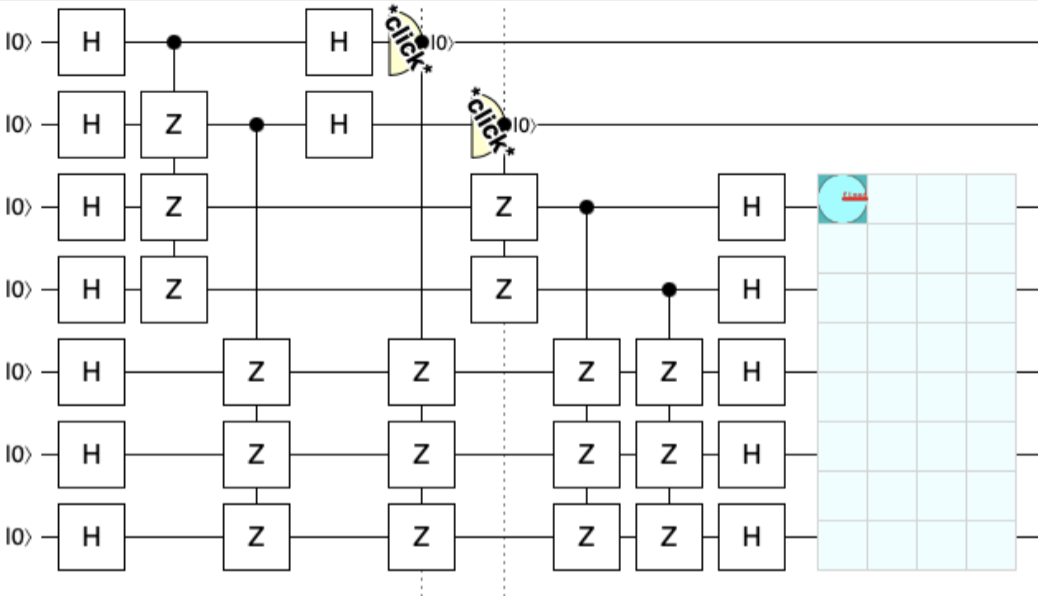